In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import glob
import os
import math
from os import listdir
import data_visualization as dv
import pickle
import scipy 
from scipy.stats import norm
from scipy import stats
from tqdm import tqdm 
import random

wheel = dv.ColorWheel()

In [2]:

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.style.use('cashaback_dark')
#%% Plot properties
box_lw = 2.5 #box linewidth
boxwidth = .07 #box width
whisker_lw = 2.0 #whisker linewidth
circle_size = 8 

tp3_title = "1000,50"
tp4_title = "1000,150"
tp5_title = '1100,50'
tp6_title = "1100,150"
tp7_title = "1200,50"
tp8_title = '1200,150'
tp9_title = '1300,100'
tp10_title = '1300,200'
trial_block_titles = [tp3_title, tp4_title, tp5_title,tp6_title, tp7_title, tp8_title]

box_color1 = wheel.seth_red
box_color2 = wheel.seth_blue
box_color3 = '0.4'
#boxprops
two_props = {"facecolor": "none", "edgecolor" : box_color1, "linewidth": box_lw, "alpha": 1}
three_props = {"facecolor": "none", "edgecolor" : box_color2, "linewidth": box_lw, "alpha": 1}
four_props = {"facecolor": "none", "edgecolor" : box_color3, "linewidth": box_lw, "alpha": 1}
#whiskerprops
two_whisk = {"linewidth" : whisker_lw, "color": box_color1}
three_whisk = {"linewidth" : whisker_lw, "color": box_color2}
four_whisk = {"linewidth" : whisker_lw, "color": box_color3}
#capprops
two_cap = {"linewidth" : whisker_lw, "color": box_color1}
three_cap = {"linewidth" : whisker_lw, "color": box_color2}
four_cap = {"linewidth" : whisker_lw, "color": box_color3}
#medianprops
two_median = {"linewidth" : whisker_lw, "color": box_color1}     
three_median = {"linewidth" : whisker_lw, "color": box_color2}   
four_median = {"linewidth" : whisker_lw, "color": box_color3}        
    
#total_indecisions = np.concatenate((perc_player_indecisions,perc_indecisions_R))
props = [{}, {}, {}, {}, {}, {}]
props_dict = {}
box_color = 'grey'
dot_color = 'black'   

In [3]:
# Initial thangs
os.chdir('D:\\Subject_Data\\Seth_MatchPennies_Agent_Exp1\\')
PATH = os.getcwd()
SAVE_PATH = PATH+'Group_Figures\\'
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

# Fields pull and pull list
os.chdir('D:\Subject_Data\Seth_MatchPennies_Agent_Exp1')
PATH = os.getcwd()
figures_pull_list = []
figures_pull_list_control = []
figures_pull_list_task = []
fields_pull = []
with open(PATH+"\\Figures_Pull_List.txt", "r") as pull_file:
    figures_pull_list = pull_file.read().splitlines()
with open(PATH+"\\Figures_Pull_List_Control.txt", "r") as pull_file:
    analysis_pull_list_control = pull_file.read().splitlines()
with open(PATH+"\\Figures_Pull_List_Task.txt", "r") as pull_file:
    analysis_pull_list_task = pull_file.read().splitlines()
with open(PATH+"\\Fields_Pull.txt", "r") as fields_pull:
    fields_pull = fields_pull.read().splitlines()
num_subjects = len(figures_pull_list)
task_name = 'Seth_MatchPennies_Agent_Exp1'

### Functions 

In [4]:
#%% Box plot with option to make double boxplot
def boxplot(data, xlocs, ylocs, box_widths = 0.15, shift_box = False, shift_direction = 1, 
            legend_labels = None, xlab = None, ylab=None, title=None):
    og_xlocs = xlocs
    box_xlocs = xlocs
    props = [two_props,two_whisk,two_cap,two_median]
    if shift_box:
        box_xlocs = box_xlocs + shift_direction*box_widths*4
        xlocs = xlocs + shift_direction*box_widths*4
        if shift_direction == 1:
            props = [three_props,three_whisk,three_cap,three_median]
        else:
            props = [two_props,two_whisk,two_cap,two_median]

    filtered_data = data
    if np.isnan(data).any():
        mask = ~np.isnan(data)
        filtered_data = [d[m] for d,m in zip(data.T, mask.T)]
    else:
        filtered_data = data
    ax.patch.set_alpha(0.05)
    markercolor = ['orange','r','g','b','black',wheel.dark_blue]
    ax.boxplot(filtered_data, positions=box_xlocs, patch_artist=True, boxprops = props[0], whiskerprops = props[1], 
                capprops = props[2], medianprops = props[3], showfliers=False, widths = (box_widths)*len(xlocs))
    ax.set_xticks(og_xlocs) 
    #ax.set_xticklabels(trial_block_titles)
    ax.set_yticks(ylocs)
    ax.set_yticklabels(ylocs) 
    ax.set_xlabel(xlab, fontweight = 'semibold')
    ax.set_ylabel(ylab, fontweight = 'semibold')
    ax.set_title(title, fontweight = 'semibold')
    if shift_box:
        colors = [wheel.seth_red, wheel.seth_blue]
        dv.Custom_Legend(ax, legend_labels, colors, fontsize = 12)


### Pickle

Pickle Load Control Tasks


In [5]:
coincidence_trials = 50
reaction_trials = 50
interval_trials = 50
# ---------------Controls-------------------------
player_reaction_decision_array = np.empty((num_subjects, reaction_trials))
agent_reaction_decision_array = np.empty((num_subjects, reaction_trials))
player_reaction_time = np.zeros([num_subjects,reaction_trials])*np.nan 
player_reaction_movement_time = np.zeros([num_subjects,reaction_trials])*np.nan
reaction_trial_start = np.zeros((num_subjects,reaction_trials))*np.nan 
coincidence_trial_start = np.zeros((num_subjects, coincidence_trials))*np.nan
coincidence_reach_time = np.zeros((num_subjects, coincidence_trials))*np.nan
interval_trial_start = np.zeros((num_subjects, interval_trials))*np.nan
interval_reach_time = np.zeros((num_subjects, interval_trials))*np.nan

for i in range(num_subjects):
    subname = figures_pull_list[i]
    data_path = PATH+f'\\Subjects_Analyzed\\{subname}\\'
    reaction_trial_start[i,:] = pickle.load(open(data_path + f'{subname}_reaction_trial_start.pkl', 'rb'))
    player_reaction_time[i,:] = pickle.load(open(data_path + f'{subname}_player_reaction_time.pkl', 'rb'))
    player_reaction_movement_time[i,:] = pickle.load(open(data_path + f'{subname}_player_reaction_movement_time.pkl', 'rb'))
    player_reaction_decision_array[i,:] = pickle.load(open(data_path + f'{subname}_player_reaction_decision_array.pkl', 'rb'))
    agent_reaction_decision_array[i,:] = pickle.load(open(data_path + f'{subname}_agent_reaction_decision_time.pkl', 'rb'))
    reaction_trial_start[i,:] = pickle.load(open(data_path + f'{subname}_reaction_trial_start.pkl', 'rb'))
    interval_trial_start[i,:] = pickle.load(open(data_path + f'{subname}_interval_trial_start.pkl', 'rb'))
    interval_reach_time[i,:] = pickle.load(open(data_path + f'{subname}_interval_reach_time.pkl', 'rb'))
    coincidence_trial_start[i,:] = pickle.load(open(data_path + f'{subname}_coincidence_trial_start.pkl', 'rb'))
    coincidence_reach_time[i,:] =  pickle.load(open(data_path + f'{subname}_coincidence_reach_time.pkl', 'rb'))

Pickle Load Task and Washout

In [6]:
path1 = PATH+'\\'+'Sub1_Task'
task_df = pd.read_csv(path1+f'\\Sub1_TaskTrial_Table.csv')
task_df = task_df.loc[task_df['Condition type']==3] # Only get the task condition 
num_trials = int(task_df.iloc[-1]['Block_Step']) # number of trials in each block
num_blocks = int(task_df.iloc[-1]['Block_Row']/2)
tot_trials = int(num_trials*num_blocks)
trial_time = int(task_df.iloc[0]['Condition time'])
task_df_columns = len(fields_pull)
trial_table = np.empty((num_subjects, tot_trials, 4), int)
#----------------- TASK--------------------------------
player_task_reach_time = np.zeros([num_subjects,num_blocks,num_trials])*np.nan 
player_task_decision_time = np.zeros([num_subjects,num_blocks,num_trials])*np.nan 
player_task_decision_array = np.zeros([num_subjects,num_blocks,num_trials])*np.nan
player_task_movement_time = np.zeros([num_subjects,num_blocks,num_trials])*np.nan
agent_task_reach_time = np.zeros([num_subjects,num_blocks,num_trials])*np.nan 
agent_task_decision_time = np.zeros([num_subjects,num_blocks,num_trials])*np.nan 
agent_task_decision_array = np.zeros([num_subjects,num_blocks,num_trials])*np.nan

# -------------- Washout-------------------
washout_trials = 25
player_washout_reach_time = np.zeros([num_subjects,num_blocks,washout_trials])*np.nan 
player_washout_decision_time = np.zeros([num_subjects,num_blocks,washout_trials])*np.nan 
player_washout_decision_array = np.zeros([num_subjects,num_blocks,washout_trials])*np.nan
player_washout_movement_time = np.zeros([num_subjects,num_blocks,washout_trials])*np.nan
agent_washout_reach_time = np.zeros([num_subjects,num_blocks,washout_trials])*np.nan 
agent_washout_decision_time = np.zeros([num_subjects,num_blocks,washout_trials])*np.nan 
agent_washout_decision_array = np.zeros([num_subjects,num_blocks,washout_trials])*np.nan
agent_washout_movement_time = np.zeros([num_subjects,num_blocks,washout_trials])*np.nan

for i in range(num_subjects):
    subname = figures_pull_list[i]
    data_path = PATH+f'\\Subjects_Analyzed\\{subname}\\'
    #task_data[i,:,:,:,:] = pickle.load(open(data_path + f'{subname}_task_data.pkl', 'rb'))
    player_task_decision_time[i,:,:] = pickle.load( open(data_path + f'{subname}_player_task_decision_time.pkl', 'rb'))
    player_task_decision_array[i,:,:] = pickle.load( open(data_path + f'{subname}_player_task_decision_array.pkl', 'rb'))
    player_task_movement_time[i,:,:] = pickle.load(open(data_path + f'{subname}_player_task_movement_time.pkl', 'rb'))
    player_task_reach_time[i,:,:] = pickle.load( open(data_path + f'{subname}_player_task_reach_time.pkl', 'rb'))
    agent_task_decision_time[i,:,:] = pickle.load( open(data_path + f'{subname}_agent_task_decision_time.pkl', 'rb'))
    agent_task_decision_array[i,:,:] = pickle.load(open(data_path + f'{subname}_agent_task_decision_array.pkl', 'rb'))
    agent_task_reach_time[i,:,:] = pickle.load(open(data_path + f'{subname}_agent_task_reach_time.pkl', 'rb'))
    player_washout_decision_time[i,:,:] = pickle.load( open(data_path + f'{subname}_player_washout_decision_time.pkl', 'rb'))
    player_washout_decision_array[i,:,:] = pickle.load( open(data_path + f'{subname}_player_washout_decision_array.pkl', 'rb'))
    player_washout_movement_time[i,:,:] = pickle.load(open(data_path + f'{subname}_player_washout_movement_time.pkl', 'rb'))
    player_washout_reach_time[i,:,:] = pickle.load( open(data_path + f'{subname}_player_washout_reach_time.pkl', 'rb'))
    agent_washout_decision_time[i,:,:] = pickle.load( open(data_path + f'{subname}_agent_washout_decision_time.pkl', 'rb'))
    agent_washout_decision_array[i,:,:] = pickle.load(open(data_path + f'{subname}_agent_washout_decision_array.pkl', 'rb'))
    agent_washout_reach_time[i,:,:] = pickle.load(open(data_path + f'{subname}_agent_washout_reach_time.pkl', 'rb'))

### Calculations

Indecisions, Wins, Incorrects

In [7]:
# Win, Loss, Indecision counts
# Make sure agent_task_decision_array replaces 2 with -1 from the first pilot
agent_task_decision_array = np.where(agent_task_decision_array ==2,-1,agent_task_decision_array)
player_indecisions = np.zeros((num_subjects, num_blocks))
player_wins = np.zeros((num_subjects, num_blocks))
player_incorrects = np.zeros((num_subjects,num_blocks))
for i in range(num_subjects):
    for j in range(num_blocks):
        player_indecisions[i,j] = np.count_nonzero(player_task_decision_array[i,j,:] == 0)
        player_wins[i,j] = np.count_nonzero(np.logical_and(player_task_decision_array[i,j,:] == 1 , agent_task_decision_array[i,j,:] == 1))
        player_wins[i,j]+= np.count_nonzero(np.logical_and(player_task_decision_array[i,j,:] == -1 , agent_task_decision_array[i,j,:] == -1))
        player_wins[i,j]+= np.count_nonzero(np.logical_and(player_task_decision_array[i,j,:] == -1 , agent_task_decision_array[i,j,:] == 0))
        player_wins[i,j]+= np.count_nonzero(np.logical_and(player_task_decision_array[i,j,:] == 1 , agent_task_decision_array[i,j,:] == 0))
        player_incorrects[i,j] = np.count_nonzero(np.logical_and(player_task_decision_array[i,j,:] == 1 , agent_task_decision_array[i,j,:] == -1))
        player_incorrects[i,j] += np.count_nonzero(np.logical_and(player_task_decision_array[i,j,:] == -1 , agent_task_decision_array[i,j,:] == 1))
perc_player_indecisions = (player_indecisions / num_trials)*100
perc_player_wins = (player_wins / num_trials)*100
perc_player_incorrects = (player_incorrects/num_trials)*100

### Calculate first half second half and the cutoff

In [8]:
# Calculate first 40 and last 60 trials
n = 40
player_indecisions_cut_off_first = np.zeros((num_subjects, num_blocks))
player_wins_cut_off_first = np.zeros((num_subjects, num_blocks))
player_incorrects_cut_off_first = np.zeros((num_subjects,num_blocks))
for i in range(num_subjects):
    for j in range(num_blocks):
        player_indecisions_cut_off_first[i,j] = np.count_nonzero(player_task_decision_array[i,j,:n] == 0)
        player_wins_cut_off_first[i,j] = np.count_nonzero(np.logical_and(player_task_decision_array[i,j,:n] == 1 , agent_task_decision_array[i,j,:n] == 1))
        player_wins_cut_off_first[i,j]+= np.count_nonzero(np.logical_and(player_task_decision_array[i,j,:n] == -1 , agent_task_decision_array[i,j,:n] == -1))
        player_wins_cut_off_first[i,j]+= np.count_nonzero(np.logical_and(player_task_decision_array[i,j,:n] == -1 , agent_task_decision_array[i,j,:n] == 0))
        player_wins_cut_off_first[i,j]+= np.count_nonzero(np.logical_and(player_task_decision_array[i,j,:n] == 1 , agent_task_decision_array[i,j,:n] == 0))
        player_incorrects_cut_off_first[i,j] = np.count_nonzero(np.logical_and(player_task_decision_array[i,j,:n] == 1 , agent_task_decision_array[i,j,:n] == -1))
        player_incorrects_cut_off_first[i,j] += np.count_nonzero(np.logical_and(player_task_decision_array[i,j,:n] == -1 , agent_task_decision_array[i,j,:n] == 1))
        player_indecisions_cut_off_first[i,j] = np.count_nonzero(player_task_decision_array[i,j,:n] == 0)
perc_player_indecisions_cut_off_first = (player_indecisions_cut_off_first / (n))*100
perc_player_wins_cut_off_first = (player_wins_cut_off_first / (n))*100
perc_player_incorrects_cut_off_first = (player_incorrects_cut_off_first / (n))*100

In [9]:
# Calculate second 40 and last 60 trials
k = 100 - n
player_indecisions_cut_off_second = np.zeros((num_subjects, num_blocks))
player_wins_cut_off_second = np.zeros((num_subjects, num_blocks))
player_incorrects_cut_off_second = np.zeros((num_subjects,num_blocks))
for i in range(num_subjects):
    for j in range(num_blocks):
        player_indecisions_cut_off_second[i,j] = np.count_nonzero(player_task_decision_array[i,j,n:] == 0)
        player_wins_cut_off_second[i,j] = np.count_nonzero(np.logical_and(player_task_decision_array[i,j,n:] == 1 , agent_task_decision_array[i,j,n:] == 1))
        player_wins_cut_off_second[i,j]+= np.count_nonzero(np.logical_and(player_task_decision_array[i,j,n:] == -1 , agent_task_decision_array[i,j,n:] == -1))
        player_wins_cut_off_second[i,j]+= np.count_nonzero(np.logical_and(player_task_decision_array[i,j,n:] == -1 , agent_task_decision_array[i,j,n:] == 0))
        player_wins_cut_off_second[i,j]+= np.count_nonzero(np.logical_and(player_task_decision_array[i,j,n:] == 1 , agent_task_decision_array[i,j,n:] == 0))
        player_incorrects_cut_off_second[i,j] = np.count_nonzero(np.logical_and(player_task_decision_array[i,j,n:] == 1 , agent_task_decision_array[i,j,n:] == -1))
        player_incorrects_cut_off_second[i,j] += np.count_nonzero(np.logical_and(player_task_decision_array[i,j,n:] == -1 , agent_task_decision_array[i,j,n:] == 1))
        player_indecisions_cut_off_second[i,j] = np.count_nonzero(player_task_decision_array[i,j,n:] == 0)
perc_player_indecisions_cut_off_second = (player_indecisions_cut_off_second / (k))*100
perc_player_wins_cut_off_second = (player_wins_cut_off_second / (k))*100
perc_player_incorrects_cut_off_second = (player_incorrects_cut_off_second / (k))*100

In [10]:
# Calculate first half
m = int(num_trials/2)
player_indecisions_first_half = np.zeros((num_subjects, num_blocks))
player_wins_first_half = np.zeros((num_subjects, num_blocks))
player_incorrects_first_half = np.zeros((num_subjects,num_blocks))
for i in range(num_subjects):
    for j in range(num_blocks):
        player_indecisions_first_half[i,j] = np.count_nonzero(player_task_decision_array[i,j,:m] == 0)
        player_wins_first_half[i,j] = np.count_nonzero(np.logical_and(player_task_decision_array[i,j,:m] == 1 , agent_task_decision_array[i,j,:m] == 1))
        player_wins_first_half[i,j]+= np.count_nonzero(np.logical_and(player_task_decision_array[i,j,:m] == -1 , agent_task_decision_array[i,j,:m] == -1))
        player_wins_first_half[i,j]+= np.count_nonzero(np.logical_and(player_task_decision_array[i,j,:m] == -1 , agent_task_decision_array[i,j,:m] == 0))
        player_wins_first_half[i,j]+= np.count_nonzero(np.logical_and(player_task_decision_array[i,j,:m] == 1 , agent_task_decision_array[i,j,:m] == 0))
        player_incorrects_first_half[i,j] = np.count_nonzero(np.logical_and(player_task_decision_array[i,j,:m] == 1 , agent_task_decision_array[i,j,:m] == -1))
        player_incorrects_first_half[i,j] += np.count_nonzero(np.logical_and(player_task_decision_array[i,j,:m] == -1 , agent_task_decision_array[i,j,:m] == 1))
        player_indecisions_first_half[i,j] = np.count_nonzero(player_task_decision_array[i,j,:m] == 0)
perc_player_indecisions_first_half = (player_indecisions_first_half / m)*100
perc_player_wins_first_half = (player_wins_first_half / m)*100
perc_player_incorrects_first_half = (player_incorrects_first_half / m)*100

In [11]:
# Calculate second half
player_indecisions_second_half = np.zeros((num_subjects, num_blocks))
player_wins_second_half = np.zeros((num_subjects, num_blocks))
player_incorrects_second_half = np.zeros((num_subjects,num_blocks))
for i in range(num_subjects):
    for j in range(num_blocks):
        player_indecisions_second_half[i,j] = np.count_nonzero(player_task_decision_array[i,j,m:] == 0)
        player_wins_second_half[i,j] = np.count_nonzero(np.logical_and(player_task_decision_array[i,j,m:] == 1 , agent_task_decision_array[i,j,m:] == 1))
        player_wins_second_half[i,j]+= np.count_nonzero(np.logical_and(player_task_decision_array[i,j,m:] == -1 , agent_task_decision_array[i,j,m:] == -1))
        player_wins_second_half[i,j]+= np.count_nonzero(np.logical_and(player_task_decision_array[i,j,m:] == -1 , agent_task_decision_array[i,j,m:] == 0))
        player_wins_second_half[i,j]+= np.count_nonzero(np.logical_and(player_task_decision_array[i,j,m:] == 1 , agent_task_decision_array[i,j,m:] == 0))
        player_incorrects_second_half[i,j] = np.count_nonzero(np.logical_and(player_task_decision_array[i,j,m:] == 1 , agent_task_decision_array[i,j,m:] == -1))
        player_incorrects_second_half[i,j] += np.count_nonzero(np.logical_and(player_task_decision_array[i,j,m:] == -1 , agent_task_decision_array[i,j,m:] == 1))
        player_indecisions_second_half[i,j] = np.count_nonzero(player_task_decision_array[i,j,m:] == 0)
perc_player_indecisions_second_half = (player_indecisions_second_half / m)*100
perc_player_wins_second_half = (player_wins_second_half / m)*100
perc_player_incorrects_second_half = (player_incorrects_second_half / m)*100

In [12]:
perc_player_wins_second_half

array([[37.5, 52.5, 30. , 35. , 55. , 60. ],
       [80. , 72.5, 47.5, 67.5, 40. , 55. ],
       [90. , 72.5, 42.5, 45. , 30. , 65. ],
       [50. , 57.5, 52.5, 52.5, 47.5, 37.5],
       [92.5, 85. , 77.5, 70. , 45. , 67.5],
       [62.5, 62.5, 57.5, 62.5, 30. , 55. ],
       [82.5, 62.5, 57.5, 47.5,  7.5, 45. ],
       [75. , 65. , 60. , 70. , 40. , 47.5],
       [95. , 87.5, 67.5, 57.5, 35. , 55. ],
       [85. , 75. , 50. , 65. , 42.5, 50. ],
       [72.5, 62.5, 52.5, 47.5, 30. , 55. ],
       [75. , 67.5, 60. , 57.5, 40. , 60. ],
       [37.5, 52.5, 30. , 35. , 55. , 60. ],
       [80. , 72.5, 47.5, 67.5, 40. , 55. ]])

In [13]:
# Get reach and decision time thangs
agent_task_reach_time_first_half = agent_task_reach_time[:,:,:50]
player_task_reach_time_first_half = player_task_reach_time[:,:,:50]
agent_task_decision_time_first_half = agent_task_decision_time[:,:,:50]
player_task_decision_time_first_half = player_task_decision_time[:,:,:50]

agent_task_reach_time_second_half = agent_task_reach_time[:,:,50:]
player_task_reach_time_second_half = player_task_reach_time[:,:,50:]
agent_task_decision_time_second_half = agent_task_decision_time[:,:,50:]
player_task_decision_time_second_half = player_task_decision_time[:,:,50:]

n_cutoff = 40
agent_task_reach_time_cut_off_first = agent_task_reach_time[:,:,:n_cutoff]
player_task_reach_time_cut_off_first = player_task_reach_time[:,:,:n_cutoff]
agent_task_decision_time_cut_off_first = agent_task_decision_time[:,:,:n_cutoff]
player_task_decision_time_cut_off_first = player_task_decision_time[:,:,:n_cutoff]

agent_task_reach_time_cut_off_second = agent_task_reach_time[:,:,n_cutoff:]
player_task_reach_time_cut_off_second = player_task_reach_time[:,:,n_cutoff:]
agent_task_decision_time_cut_off_second = agent_task_decision_time[:,:,n_cutoff:]
player_task_decision_time_cut_off_second = player_task_decision_time[:,:,n_cutoff:]

In [14]:
# Calculate means
# First half
agent_mean_reach_time_first_half = np.nanmean(agent_task_reach_time_first_half,axis = 2)
agent_sd_reach_time_first_half = np.nanstd(agent_task_reach_time_first_half,axis = 2)
agent_mean_decision_time_first_half = np.nanmean(agent_task_decision_time_first_half, axis =2)
agent_sd_decision_time_first_half = np.nanstd(agent_task_decision_time_first_half, axis =2)
player_mean_reach_time_first_half = np.nanmean(player_task_reach_time_first_half,axis=2)
player_sd_reach_time_first_half = np.nanstd(player_task_reach_time_first_half,axis=2)
player_mean_decision_time_first_half = np.nanmean(player_task_decision_time_first_half,axis=2)
player_sd_decision_time_first_half = np.nanstd(agent_task_reach_time_first_half,axis = 2)
# Second half
agent_mean_reach_time_second_half = np.nanmean(agent_task_reach_time_second_half,axis = 2)
agent_sd_reach_time_second_half = np.nanstd(agent_task_reach_time_second_half,axis = 2)
agent_mean_decision_time_second_half = np.nanmean(agent_task_decision_time_second_half, axis =2)
agent_sd_decision_time_second_half = np.nanstd(agent_task_decision_time_second_half, axis =2)
player_mean_reach_time_second_half = np.nanmean(player_task_reach_time_second_half,axis=2)
player_sd_reach_time_second_half = np.nanstd(player_task_reach_time_second_half,axis=2)
player_mean_decision_time_second_half = np.nanmean(player_task_decision_time_second_half,axis=2)
player_sd_decision_time_second_half = np.nanstd(agent_task_reach_time_second_half,axis = 2)

# Cut off first
agent_mean_reach_time_cut_off_first = np.nanmean(agent_task_reach_time_cut_off_first,axis = 2)
agent_sd_reach_time_cut_off_first = np.nanstd(agent_task_reach_time_cut_off_first,axis = 2)
agent_mean_decision_time_cut_off_first = np.nanmean(agent_task_decision_time_cut_off_first, axis =2)
agent_sd_decision_time_cut_off_first = np.nanstd(agent_task_decision_time_cut_off_first, axis =2)
player_mean_reach_time_cut_off_first = np.nanmean(player_task_reach_time_cut_off_first,axis=2)
player_sd_reach_time_cut_off_first = np.nanstd(player_task_reach_time_cut_off_first,axis=2)
player_mean_decision_time_cut_off_first = np.nanmean(player_task_decision_time_cut_off_first,axis=2)
player_sd_decision_time_cut_off_first = np.nanstd(agent_task_reach_time_cut_off_first,axis = 2)
# Cut off second
agent_mean_reach_time_cut_off_second = np.nanmean(agent_task_reach_time_cut_off_second,axis = 2)
agent_sd_reach_time_cut_off_second = np.nanstd(agent_task_reach_time_cut_off_second,axis = 2)
agent_mean_decision_time_cut_off_second = np.nanmean(agent_task_decision_time_cut_off_second, axis =2)
agent_sd_decision_time_cut_off_second = np.nanstd(agent_task_decision_time_cut_off_second, axis =2)
player_mean_reach_time_cut_off_second = np.nanmean(player_task_reach_time_cut_off_second,axis=2)
player_sd_reach_time_cut_off_second = np.nanstd(player_task_reach_time_cut_off_second,axis=2)
player_mean_decision_time_cut_off_second = np.nanmean(player_task_decision_time_cut_off_second,axis=2)
player_sd_decision_time_cut_off_second = np.nanstd(agent_task_reach_time_cut_off_second,axis = 2)

### Plots

First Half Second Half Mean Decision Times

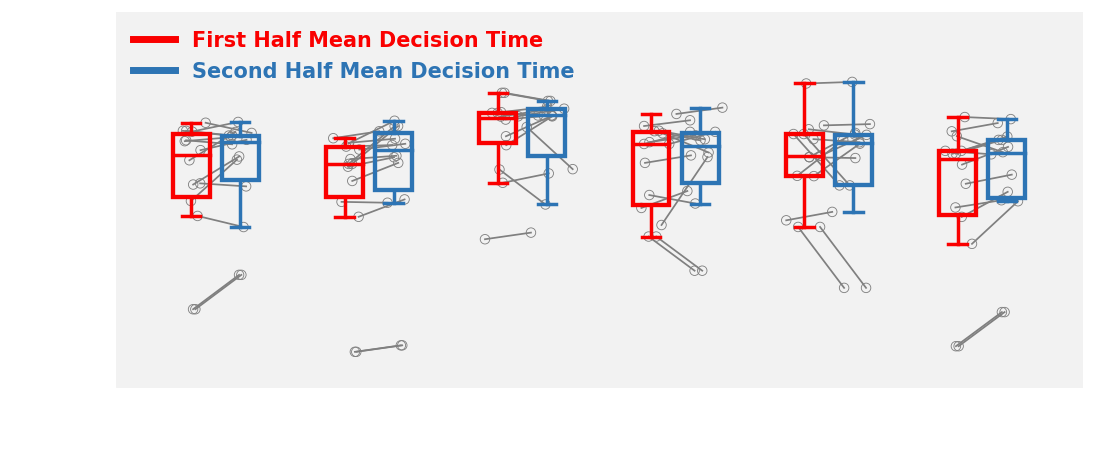

In [15]:
#%% Decision time means for reactions and gambles for each condition
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(600,1650,200)
box_width = 0.04
plt.figure(dpi=125, figsize=(10,4))
ax=plt.subplot()
boxplot(player_mean_decision_time_first_half, xlocs=xlocs, ylocs=ylocs, box_widths = box_width, shift_box = True, shift_direction = -1, legend_labels = ['Reaction', "Gamble"], xlab = "Agent Mean Reach Time (ms)",
        ylab='Incorrect Decisions (%)', title='Incorrect Decisions')

boxplot(player_mean_decision_time_second_half, xlocs, ylocs, box_widths = box_width, shift_box = True, shift_direction = 1, legend_labels = ['First Half Mean Decision Time', "Second Half Mean Decision Time"], xlab = "Agent Mean,SD Decision Time (ms)",
        ylab='Decision Time (ms)', title=None)
for j in range(num_blocks):     
        m = np.array([xlocs[j],xlocs[j]])
        x_pos = m + np.array([-0.15,0.15])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[player_mean_decision_time_first_half[:,j],player_mean_decision_time_second_half[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)
ax.set_ylim(600,1650)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
#plt.savefig(PATH+save_path+'reaction_and_gamble_decision_times_boxplots_no_dots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

First-Second Half Wins

In [16]:
perc_player_wins_second_half

array([[37.5, 52.5, 30. , 35. , 55. , 60. ],
       [80. , 72.5, 47.5, 67.5, 40. , 55. ],
       [90. , 72.5, 42.5, 45. , 30. , 65. ],
       [50. , 57.5, 52.5, 52.5, 47.5, 37.5],
       [92.5, 85. , 77.5, 70. , 45. , 67.5],
       [62.5, 62.5, 57.5, 62.5, 30. , 55. ],
       [82.5, 62.5, 57.5, 47.5,  7.5, 45. ],
       [75. , 65. , 60. , 70. , 40. , 47.5],
       [95. , 87.5, 67.5, 57.5, 35. , 55. ],
       [85. , 75. , 50. , 65. , 42.5, 50. ],
       [72.5, 62.5, 52.5, 47.5, 30. , 55. ],
       [75. , 67.5, 60. , 57.5, 40. , 60. ],
       [37.5, 52.5, 30. , 35. , 55. , 60. ],
       [80. , 72.5, 47.5, 67.5, 40. , 55. ]])

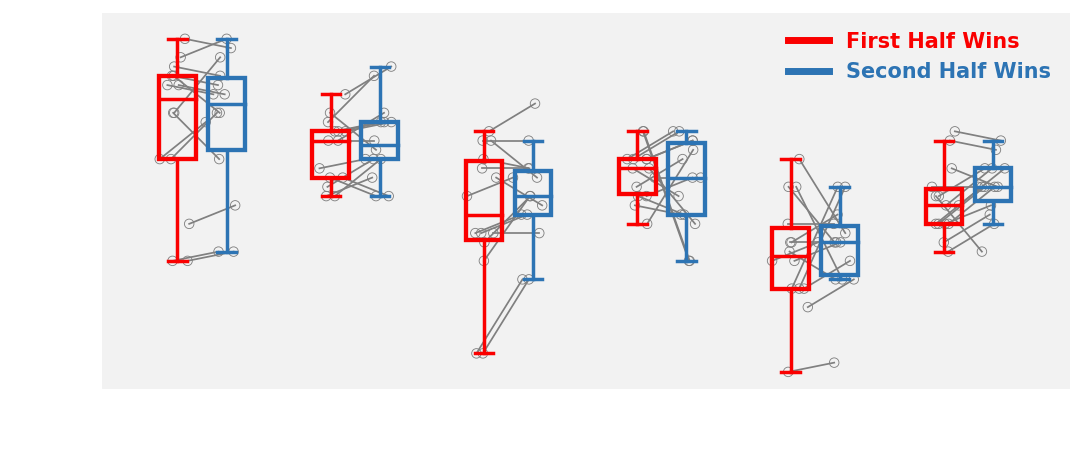

In [17]:
#%% Decision time means for reactions and gambles for each condition
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(0,125,25)
box_width = 0.04
plt.figure(dpi=125, figsize=(10,4))
ax=plt.subplot()
boxplot(perc_player_wins_first_half, xlocs=xlocs, ylocs=ylocs, box_widths = box_width, shift_box = True, shift_direction = -1, legend_labels = ['Reaction', "Gamble"], xlab = "Agent Mean Reach Time (ms)",
        ylab='Incorrect Decisions (%)', title='Incorrect Decisions')

boxplot(perc_player_wins_second_half, xlocs, ylocs, box_widths = box_width, shift_box = True, shift_direction = 1, legend_labels = ['First Half Wins', "Second Half Wins"], xlab = "Agent Mean,SD Decision Time (ms)",
        ylab='Wins (%)', title=None)
for j in range(num_blocks):     
        m = np.array([xlocs[j],xlocs[j]])
        x_pos = m + np.array([-0.15,0.15])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[perc_player_wins_first_half[:,j],perc_player_wins_second_half[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)

ax.set_ylim(0,102)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
#plt.savefig(PATH+save_path+'reaction_and_gamble_decision_times_boxplots_no_dots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

First-Second Half Indecisions

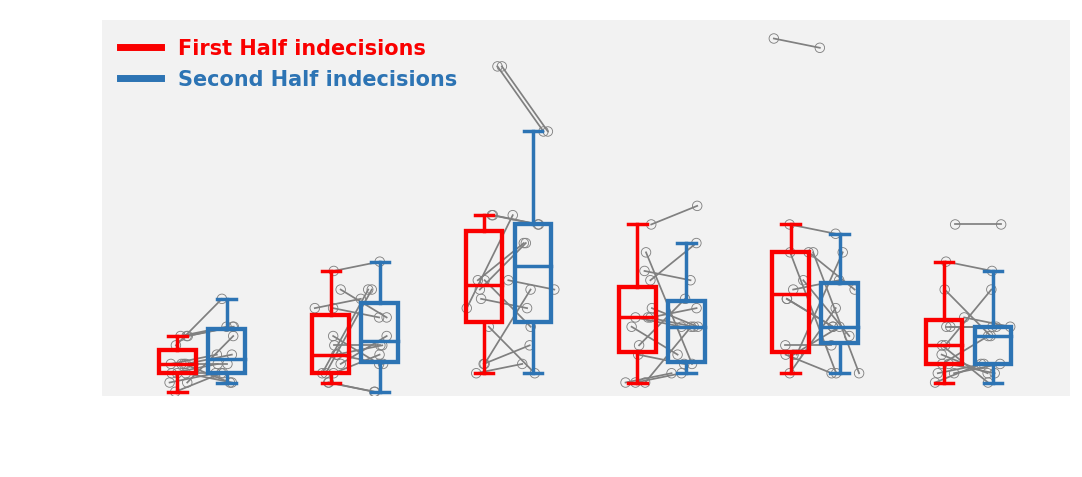

In [18]:
#%% Decision time means for reactions and gambles for each condition
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(0,125,25)
box_width = 0.04
plt.figure(dpi=125, figsize=(10,4))
ax=plt.subplot()
boxplot(perc_player_indecisions_first_half, xlocs=xlocs, ylocs=ylocs, box_widths = box_width, shift_box = True, shift_direction = -1, legend_labels = ['Reaction', "Gamble"], xlab = "Agent Mean Reach Time (ms)",
        ylab='Incorrect Decisions (%)', title='Incorrect Decisions')
#dv.jitter_array(ax=ax,x_positions=xlocs-0.15,data_list=perc_player_indecisions_first_half.T, noise_scale=0.05, include_mean = False, circle_size=30,linewidth = 0)

boxplot(perc_player_indecisions_second_half, xlocs, ylocs, box_widths = box_width, shift_box = True, shift_direction = 1, legend_labels = ['First Half indecisions', "Second Half indecisions"], xlab = "Agent Mean,SD Decision Time (ms)",
        ylab='indecisions (%)', title=None)
for j in range(num_blocks):     
        m = np.array([xlocs[j],xlocs[j]])
        x_pos = m + np.array([-0.15,0.15])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[perc_player_indecisions_first_half[:,j],perc_player_indecisions_second_half[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)

ax.set_ylim(-1.5,100)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
#plt.savefig(PATH+save_path+'reaction_and_gamble_decision_times_boxplots_no_dots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

First Half Second Half Incorrects

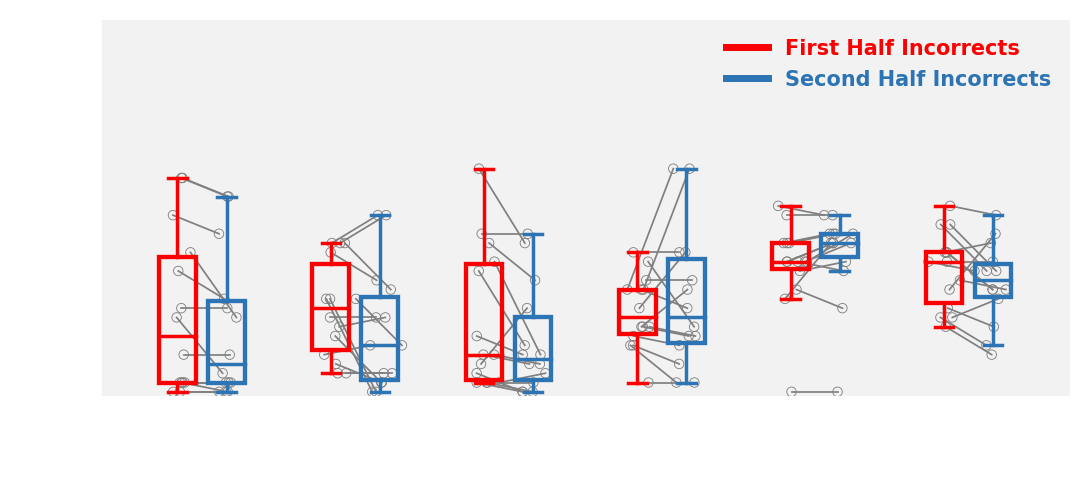

In [19]:
#%% Decision time means for reactions and gambles for each condition
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(0,125,25)
box_width = 0.04
plt.figure(dpi=125, figsize=(10,4))
ax=plt.subplot()
boxplot(perc_player_incorrects_first_half, xlocs=xlocs, ylocs=ylocs, box_widths = box_width, shift_box = True, shift_direction = -1, legend_labels = ['Reaction', "Gamble"], xlab = "Agent Mean Reach Time (ms)",
        ylab='Incorrect Decisions (%)', title='Incorrect Decisions')
#dv.jitter_array(ax=ax,x_positions=xlocs-0.15,data_list=perc_player_incorrects_first_half.T, noise_scale=0.05, include_mean = False, circle_size=30,linewidth = 0)

boxplot(perc_player_incorrects_second_half, xlocs, ylocs, box_widths = box_width, shift_box = True, shift_direction = 1, legend_labels = ['First Half Incorrects', "Second Half Incorrects"], xlab = "Agent Mean,SD Decision Time (ms)",
        ylab='Incorrects (%)', title=None)
for j in range(num_blocks):     
        m = np.array([xlocs[j],xlocs[j]])
        x_pos = m + np.array([-0.15,0.15])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[perc_player_incorrects_first_half[:,j],perc_player_incorrects_second_half[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)

ax.set_ylim(-1.5,100)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
#plt.savefig(PATH+save_path+'reaction_and_gamble_decision_times_boxplots_no_dots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

First Second CUTOFF Mean Decision Times (Deprecated)

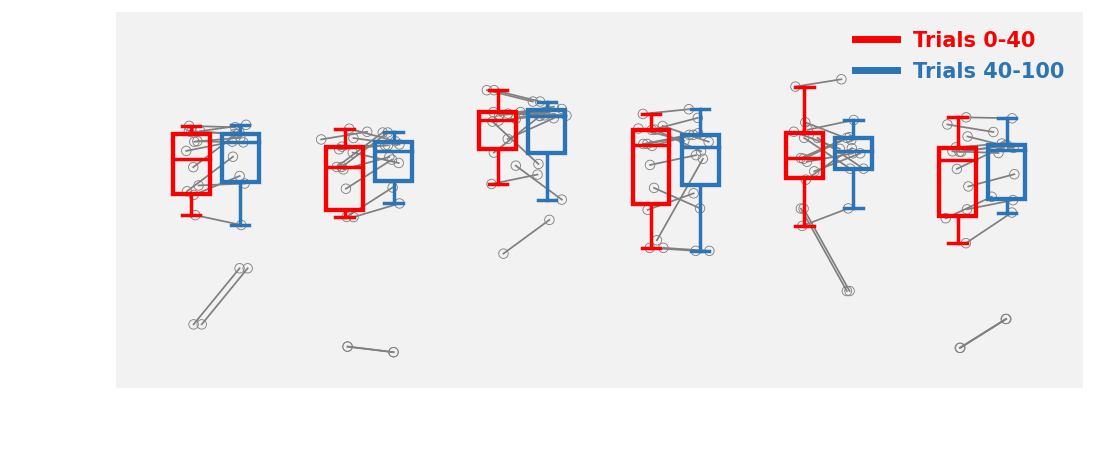

In [20]:
#%% Decision time means for reactions and gambles for each condition
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(600,1650,200)
box_width = 0.04
plt.figure(dpi=125, figsize=(10,4))
ax=plt.subplot()
boxplot(player_mean_decision_time_cut_off_first, xlocs=xlocs, ylocs=ylocs, box_widths = box_width, shift_box = True, 
        shift_direction = -1, legend_labels = ['Reaction', "Gamble"], xlab = "Agent Mean Reach Time (ms)",
        ylab='Incorrect Decisions (%)', title='Incorrect Decisions')

boxplot(player_mean_decision_time_cut_off_second, xlocs, ylocs, box_widths = box_width, shift_box = True, 
        shift_direction = 1, legend_labels = ['Trials 0-40', "Trials 40-100"], xlab = "Agent Mean,SD Decision Time (ms)",
        ylab='Decision Time (ms)', title=None)
for j in range(num_blocks):     
        m = np.array([xlocs[j],xlocs[j]])
        x_pos = m + np.array([-0.15,0.15])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[player_mean_decision_time_cut_off_first[:,j],player_mean_decision_time_cut_off_second[:,j]], 
                        noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)
ax.set_ylim(600,1650)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
#plt.savefig(PATH+save_path+'reaction_and_gamble_decision_times_boxplots_no_dots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

First-Second Cutoff Wins

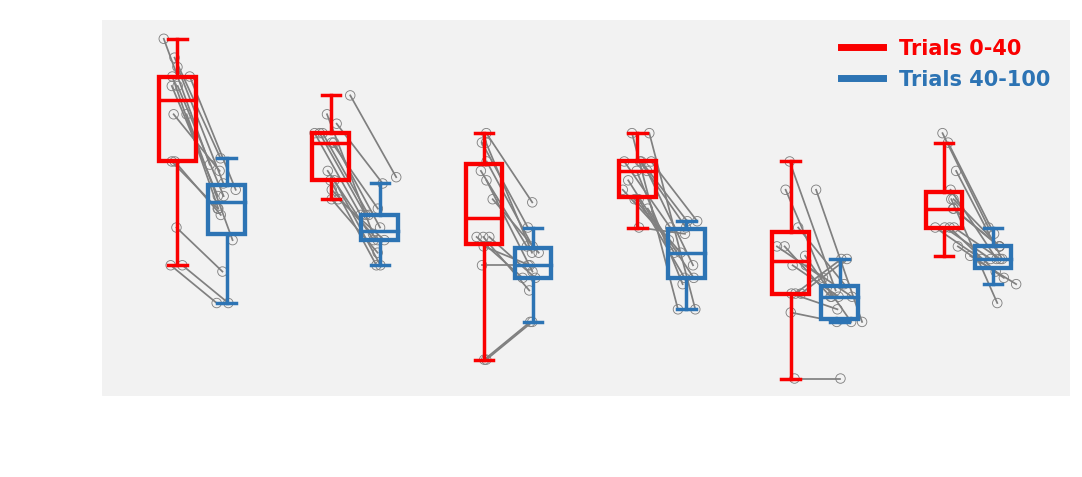

In [21]:
#%% Decision time means for reactions and gambles for each condition
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(0,125,25)
box_width = 0.04
plt.figure(dpi=125, figsize=(10,4))
ax=plt.subplot()
boxplot(perc_player_wins_cut_off_first, xlocs=xlocs, ylocs=ylocs, box_widths = box_width, shift_box = True, shift_direction = -1, legend_labels = ['Reaction', "Gamble"], xlab = "Agent Mean Reach Time (ms)",
        ylab='Incorrect Decisions (%)', title='Incorrect Decisions')

boxplot(perc_player_wins_cut_off_second, xlocs, ylocs, box_widths = box_width, shift_box = True, shift_direction = 1, legend_labels = ['Trials 0-40', "Trials 40-100"], xlab = "Agent Mean,SD Decision Time (ms)",
        ylab='Wins (%)', title=None)
for j in range(num_blocks):     
        m = np.array([xlocs[j],xlocs[j]])
        x_pos = m + np.array([-0.15,0.15])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[perc_player_wins_cut_off_first[:,j],perc_player_wins_cut_off_second[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)

ax.set_ylim(0,100)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
#plt.savefig(PATH+save_path+'reaction_and_gamble_decision_times_boxplots_no_dots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

First Second Cutoff Indecisions

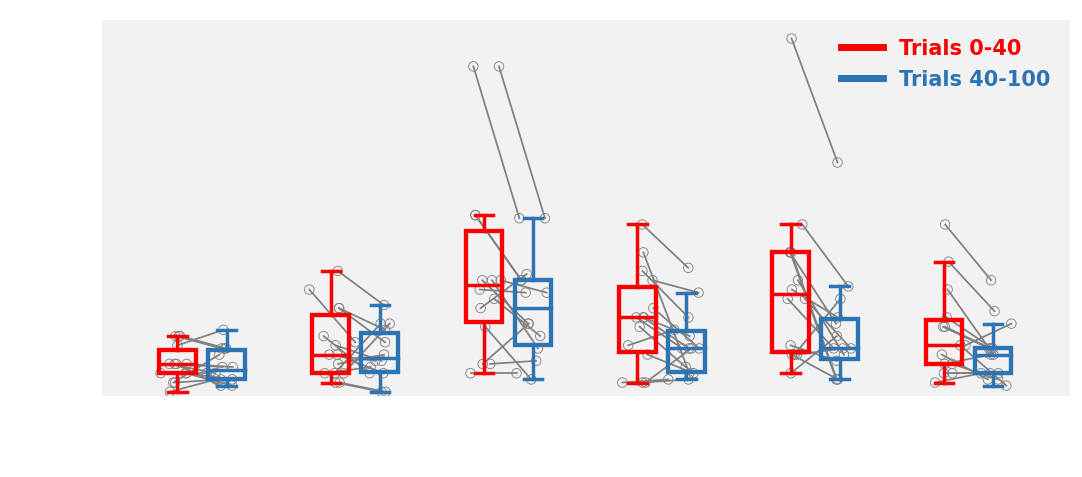

In [22]:
#%% Decision time means for reactions and gambles for each condition
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(0,125,25)
box_width = 0.04
plt.figure(dpi=125, figsize=(10,4))
ax=plt.subplot()
boxplot(perc_player_indecisions_cut_off_first, xlocs=xlocs, ylocs=ylocs, box_widths = box_width, shift_box = True, shift_direction = -1, legend_labels = ['Reaction', "Gamble"], xlab = "Agent Mean Reach Time (ms)",
        ylab='Incorrect Decisions (%)', title='Incorrect Decisions')
#dv.jitter_array(ax=ax,x_positions=xlocs-0.15,data_list=perc_player_indecisions_cut_off_first.T, noise_scale=0.05, include_mean = False, circle_size=30,linewidth = 0)

boxplot(perc_player_indecisions_cut_off_second, xlocs, ylocs, box_widths = box_width, shift_box = True, shift_direction = 1, legend_labels = ['Trials 0-40', "Trials 40-100"], xlab = "Agent Mean,SD Decision Time (ms)",
        ylab='indecisions (%)', title=None)
for j in range(num_blocks):     
        m = np.array([xlocs[j],xlocs[j]])
        x_pos = m + np.array([-0.15,0.15])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[perc_player_indecisions_cut_off_first[:,j],perc_player_indecisions_cut_off_second[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)

ax.set_ylim(-1.5,100)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
#plt.savefig(PATH+save_path+'reaction_and_gamble_decision_times_boxplots_no_dots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

First Half Second Cutoff Incorrects

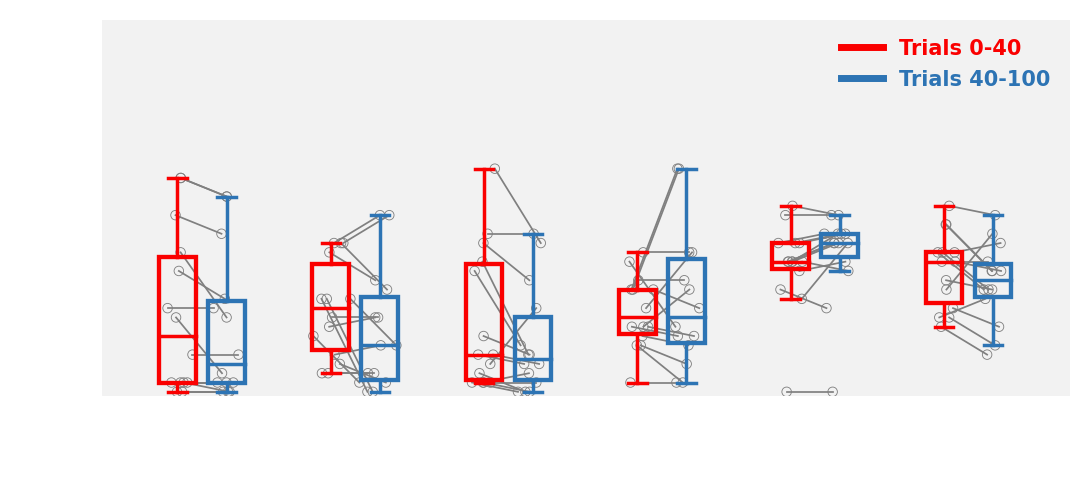

In [23]:
#%% Decision time means for reactions and gambles for each condition
xlocs = np.arange(0, num_blocks)
ylocs = np.arange(0,125,25)
box_width = 0.04
plt.figure(dpi=125, figsize=(10,4))
ax=plt.subplot()
boxplot(perc_player_incorrects_first_half, xlocs=xlocs, ylocs=ylocs, box_widths = box_width, shift_box = True, shift_direction = -1, legend_labels = ['Reaction', "Gamble"], xlab = "Agent Mean Reach Time (ms)",
        ylab='Incorrect Decisions (%)', title='Incorrect Decisions')
#dv.jitter_array(ax=ax,x_positions=xlocs-0.15,data_list=perc_player_incorrects_first_half.T, noise_scale=0.05, include_mean = False, circle_size=30,linewidth = 0)

boxplot(perc_player_incorrects_second_half, xlocs, ylocs, box_widths = box_width, shift_box = True, shift_direction = 1, legend_labels = ['Trials 0-40', "Trials 40-100"], xlab = "Agent Mean,SD Decision Time (ms)",
        ylab='Incorrects (%)', title=None)
for j in range(num_blocks):     
        m = np.array([xlocs[j],xlocs[j]])
        x_pos = m + np.array([-0.15,0.15])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[perc_player_incorrects_first_half[:,j],perc_player_incorrects_second_half[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)

ax.set_ylim(-1.5,100)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
#plt.savefig(PATH+save_path+'reaction_and_gamble_decision_times_boxplots_no_dots', dpi = 400, transparent = True, bbox_inches='tight')
plt.show()

### Just use First 80 Trials (not done yet)

In [24]:
# Calculate second half
player_indecisions_second_half = np.zeros((num_subjects, num_blocks))
player_wins_second_half = np.zeros((num_subjects, num_blocks))
player_incorrects_second_half = np.zeros((num_subjects,num_blocks))
for i in range(num_subjects):
    for j in range(num_blocks):
        player_indecisions_second_half[i,j] = np.count_nonzero(player_task_decision_array[i,j,m:] == 0)
        player_wins_second_half[i,j] = np.count_nonzero(np.logical_and(player_task_decision_array[i,j,m:] == 1 , agent_task_decision_array[i,j,m:] == 1))
        player_wins_second_half[i,j]+= np.count_nonzero(np.logical_and(player_task_decision_array[i,j,m:] == -1 , agent_task_decision_array[i,j,m:] == -1))
        player_wins_second_half[i,j]+= np.count_nonzero(np.logical_and(player_task_decision_array[i,j,m:] == -1 , agent_task_decision_array[i,j,m:] == 0))
        player_wins_second_half[i,j]+= np.count_nonzero(np.logical_and(player_task_decision_array[i,j,m:] == 1 , agent_task_decision_array[i,j,m:] == 0))
        player_incorrects_second_half[i,j] = np.count_nonzero(np.logical_and(player_task_decision_array[i,j,m:] == 1 , agent_task_decision_array[i,j,m:] == -1))
        player_incorrects_second_half[i,j] += np.count_nonzero(np.logical_and(player_task_decision_array[i,j,m:] == -1 , agent_task_decision_array[i,j,m:] == 1))
        player_indecisions_second_half[i,j] = np.count_nonzero(player_task_decision_array[i,j,m:] == 0)
perc_player_indecisions_second_half = (player_indecisions_second_half / m)*100
perc_player_wins_second_half = (player_wins_second_half / m)*100
perc_player_incorrects_second_half = (player_incorrects_second_half / m)*100

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
# Get reach and decision time thangs
agent_task_reach_time_first_half = agent_task_reach_time[:,:,:50]
player_task_reach_time_first_half = player_task_reach_time[:,:,:50]
agent_task_decision_time_first_half = agent_task_decision_time[:,:,:50]
player_task_decision_time_first_half = player_task_decision_time[:,:,:50]

agent_task_reach_time_second_half = agent_task_reach_time[:,:,50:]
player_task_reach_time_second_half = player_task_reach_time[:,:,50:]
agent_task_decision_time_second_half = agent_task_decision_time[:,:,50:]
player_task_decision_time_second_half = player_task_decision_time[:,:,50:]

n_cutoff = 40
agent_task_reach_time_cut_off_first = agent_task_reach_time[:,:,:n_cutoff]
player_task_reach_time_cut_off_first = player_task_reach_time[:,:,:n_cutoff]
agent_task_decision_time_cut_off_first = agent_task_decision_time[:,:,:n_cutoff]
player_task_decision_time_cut_off_first = player_task_decision_time[:,:,:n_cutoff]

agent_task_reach_time_cut_off_second = agent_task_reach_time[:,:,n_cutoff:]
player_task_reach_time_cut_off_second = player_task_reach_time[:,:,n_cutoff:]
agent_task_decision_time_cut_off_second = agent_task_decision_time[:,:,n_cutoff:]
player_task_decision_time_cut_off_second = player_task_decision_time[:,:,n_cutoff:]

In [ ]:
# Calculate means
# First half
agent_mean_reach_time_first_half = np.nanmean(agent_task_reach_time_first_half,axis = 2)
agent_sd_reach_time_first_half = np.nanstd(agent_task_reach_time_first_half,axis = 2)
agent_mean_decision_time_first_half = np.nanmean(agent_task_decision_time_first_half, axis =2)
agent_sd_decision_time_first_half = np.nanstd(agent_task_decision_time_first_half, axis =2)
player_mean_reach_time_first_half = np.nanmean(player_task_reach_time_first_half,axis=2)
player_sd_reach_time_first_half = np.nanstd(player_task_reach_time_first_half,axis=2)
player_mean_decision_time_first_half = np.nanmean(player_task_decision_time_first_half,axis=2)
player_sd_decision_time_first_half = np.nanstd(agent_task_reach_time_first_half,axis = 2)
# Second half
agent_mean_reach_time_second_half = np.nanmean(agent_task_reach_time_second_half,axis = 2)
agent_sd_reach_time_second_half = np.nanstd(agent_task_reach_time_second_half,axis = 2)
agent_mean_decision_time_second_half = np.nanmean(agent_task_decision_time_second_half, axis =2)
agent_sd_decision_time_second_half = np.nanstd(agent_task_decision_time_second_half, axis =2)
player_mean_reach_time_second_half = np.nanmean(player_task_reach_time_second_half,axis=2)
player_sd_reach_time_second_half = np.nanstd(player_task_reach_time_second_half,axis=2)
player_mean_decision_time_second_half = np.nanmean(player_task_decision_time_second_half,axis=2)
player_sd_decision_time_second_half = np.nanstd(agent_task_reach_time_second_half,axis = 2)

# Cut off first
agent_mean_reach_time_cut_off_first = np.nanmean(agent_task_reach_time_cut_off_first,axis = 2)
agent_sd_reach_time_cut_off_first = np.nanstd(agent_task_reach_time_cut_off_first,axis = 2)
agent_mean_decision_time_cut_off_first = np.nanmean(agent_task_decision_time_cut_off_first, axis =2)
agent_sd_decision_time_cut_off_first = np.nanstd(agent_task_decision_time_cut_off_first, axis =2)
player_mean_reach_time_cut_off_first = np.nanmean(player_task_reach_time_cut_off_first,axis=2)
player_sd_reach_time_cut_off_first = np.nanstd(player_task_reach_time_cut_off_first,axis=2)
player_mean_decision_time_cut_off_first = np.nanmean(player_task_decision_time_cut_off_first,axis=2)
player_sd_decision_time_cut_off_first = np.nanstd(agent_task_reach_time_cut_off_first,axis = 2)
# Cut off second
agent_mean_reach_time_cut_off_second = np.nanmean(agent_task_reach_time_cut_off_second,axis = 2)
agent_sd_reach_time_cut_off_second = np.nanstd(agent_task_reach_time_cut_off_second,axis = 2)
agent_mean_decision_time_cut_off_second = np.nanmean(agent_task_decision_time_cut_off_second, axis =2)
agent_sd_decision_time_cut_off_second = np.nanstd(agent_task_decision_time_cut_off_second, axis =2)
player_mean_reach_time_cut_off_second = np.nanmean(player_task_reach_time_cut_off_second,axis=2)
player_sd_reach_time_cut_off_second = np.nanstd(player_task_reach_time_cut_off_second,axis=2)
player_mean_decision_time_cut_off_second = np.nanmean(player_task_decision_time_cut_off_second,axis=2)
player_sd_decision_time_cut_off_second = np.nanstd(agent_task_reach_time_cut_off_second,axis = 2)